# Time Series


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("AirPassengers.csv")

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
data["Month"]

,Month
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
data.index = data['Month']
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [ ]:
del data['Month']
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


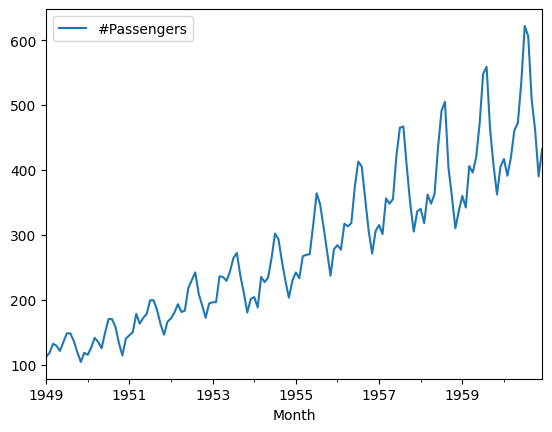

In [ ]:
data.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
#p-value > 0.05: ---> not stationary
#p-value <= 0.05: --> stationary
result = adfuller(data['#Passengers'])
print('p-value: %f' % result[1])
if result[1]>0.05:
	print('not stationary')
else:
	print("stationary")

p-value: 0.991880
not stationary


In [ ]:
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values=kpss(data['#Passengers'])
if p>0.05:
  print('stattionary')
else:
  print("not stationary")
print(p)


not stationary
0.01


<ipython-input-13-2e4a69ae690e>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats,p,lags,critical_values=kpss(data['#Passengers'])


<Axes: title={'center': 'Original Values'}, xlabel='Month'>

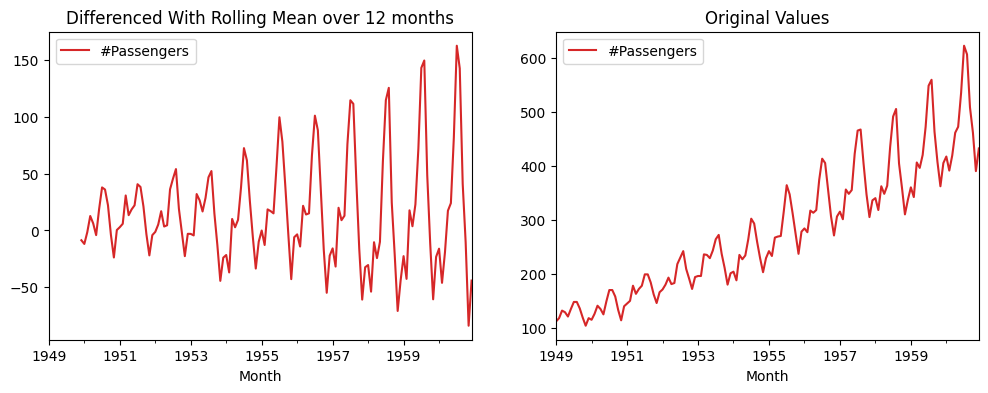

In [ ]:
rolling_mean = data.rolling(window=12).mean()
rolling_mean_detrended = data - rolling_mean

ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",
                            title="Differenced With Rolling Mean over 12 months",
                            ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4),
          color="tab:red",
          title="Original Values",
          ax=ax2)


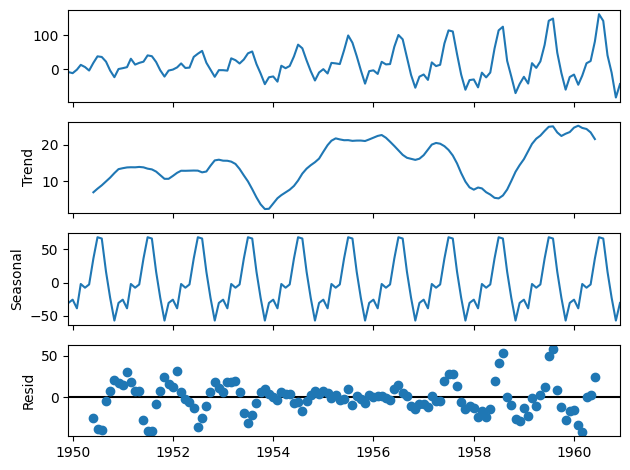

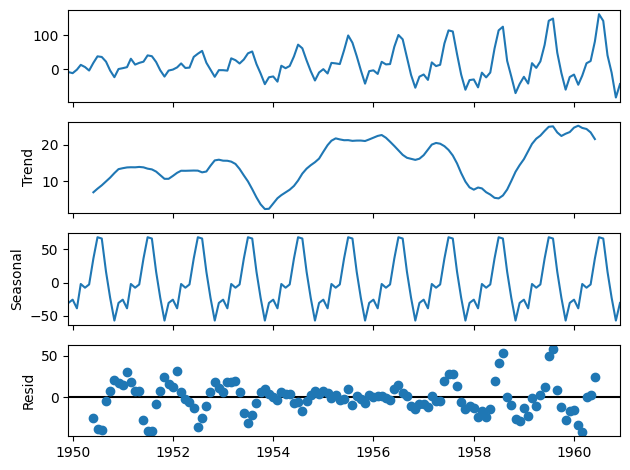

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())
decompose_result.plot()

In [ ]:
rolling_mean_detrended.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


<Axes: title={'center': 'Differenced With Rolling Mean over 12 months'}, xlabel='Month'>

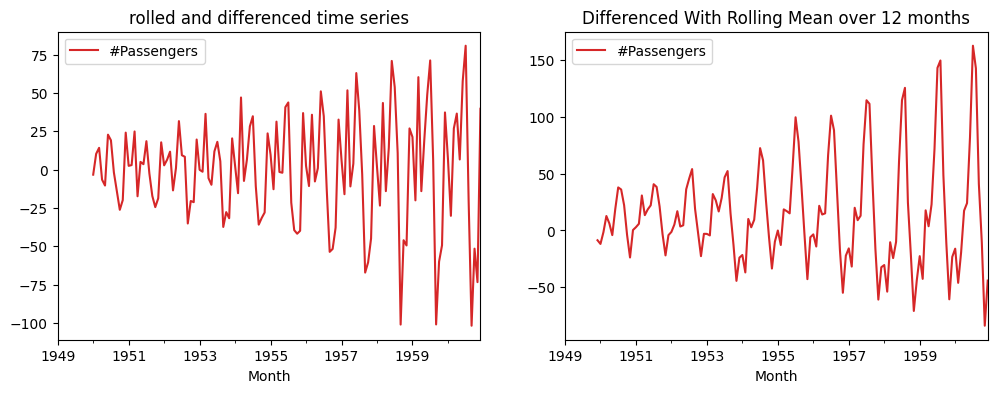

In [ ]:
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red",
                                 title="rolled and differenced time series",
                                 ax=ax1)
ax1 = plt.subplot(122)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",
                            title="Differenced With Rolling Mean over 12 months",
                            ax=ax1)

In [ ]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()
rolling_mean_detrended_diff

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


In [ ]:
result = adfuller(rolling_mean_detrended_diff['#Passengers'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.154483
p-value: 0.022775
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


In [ ]:
dftest = adfuller(rolling_mean_detrended_diff['#Passengers'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -3.1544826348635753
2. P-Value :  0.022775264967859258
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


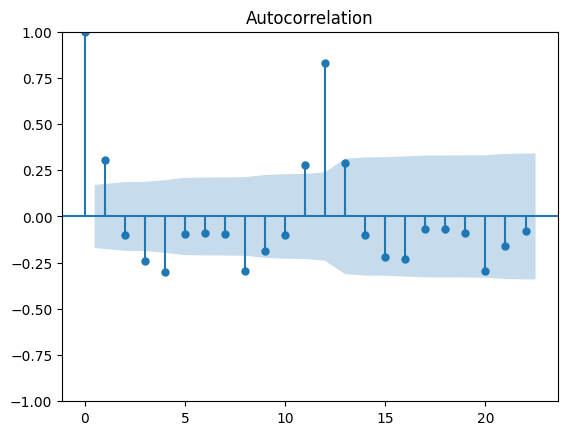

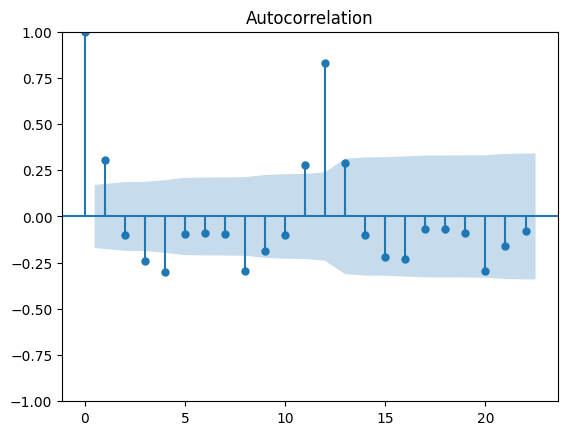

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rolling_mean_detrended_diff['#Passengers'])

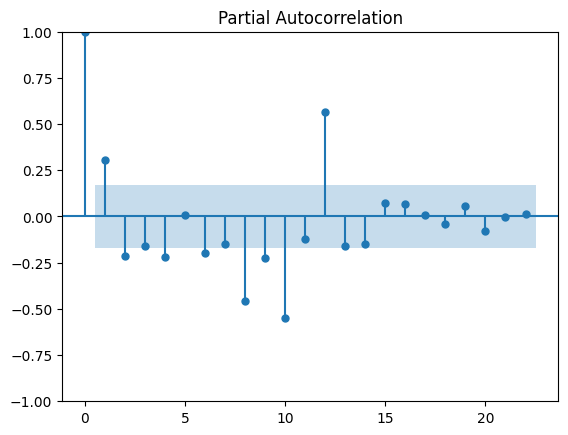

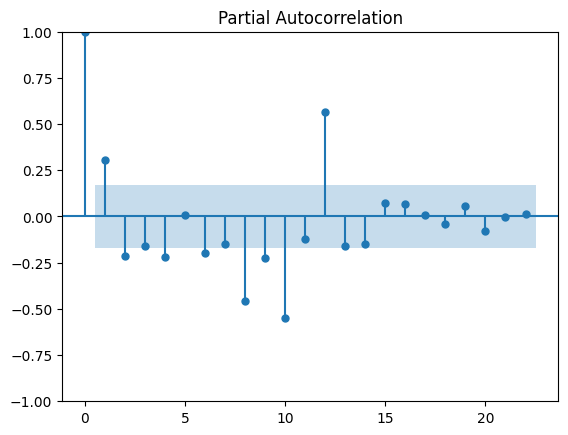

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(rolling_mean_detrended_diff['#Passengers'])

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00


In [ ]:
order = auto_arima(rolling_mean_detrended_diff['#Passengers'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=1.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=2.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.76 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Sat, 10 Aug 2024   AIC                           1235.785
Time:                        14:33:46   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.346      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5267      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9136      0.128     -7.154      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.884      0.000      -1.150      -0.491
ma.L3          0.7468      0.095      7.850      0.000       0.560       0.933
sigma2       586.1896     67.804      8.645      0.000     453.297     719.082
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

train = rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test = rolling_mean_detrended_diff.iloc[121:]['#Passengers']
# ARIMA ---> AR + MA +I ---> ARIMA--> 3= AR , I=0 , MA=3
model = ARIMA(train, order=(3,0,3))
model_fit = model.fit() # training
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(3,0,3), seasonal_order=(3,0,3,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary star